<h1 align="center"> Classwork assignment (02/11)

<h3 align="right"><i>Shantanu Bailoor</i>

### <u><i>P1: Relation between velocty and radius: </i></u>

A two-dimensional, ideal vortex has purely circumferential velocity.
$$ \Rightarrow u_r = 0 $$

Since flow is irrotational, $\nabla \times \vec{V} = 0$.

Since flow is two-dimensional, $u_{z} = 0$ and $\frac{\partial}{\partial z} = 0$.

$$ \Rightarrow \nabla \times \vec{V} = \left(\frac{1}{r} \frac {\partial (ru_{\theta}) }{\partial r} - \frac{1}{r} \frac{\partial u_{r}} {\partial \theta} \right) \vec{e_{z}} = 0 $$

$$ \Rightarrow \left( \frac {\partial (ru_{\theta}) }{\partial r} - \frac{\partial u_{r}}{\partial \theta} \right) \vec{e_{z}} = 0 $$

The flow has axial symmetry, therefore derivaties with respect to $\theta = 0$

$$ \therefore \left( \frac {\partial (ru_{\theta}) }{\partial r} \right) = 0 $$

$$ \Rightarrow ru_{\theta} = {const} $$

$$ \therefore u_{\theta} \propto \frac {1}{r} $$

Thus, the velocity in an ideal flow is only a function of radius and is inversely proportional to the radius.

In [26]:
import math
import numpy
from matplotlib import pyplot
import matplotlib
%matplotlib inline

In [27]:
#Define grid parameters

N = 100
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

rad = numpy.sqrt(X**2 + Y**2)
theta = numpy.zeros_like(rad)

for i in range (N):
    for j in range (N):
        theta[j,i] = math.atan2(Y[j,i], X[j,i])
        
#Define flow parameters
gamma = 2.0;               #vortex strength - circulation
x_v, y_v = 0.0, 0.0

uinf = 1.0

In [28]:
uvor = numpy.zeros_like(X); vvor = numpy.zeros_like(X); psi_vortex = numpy.zeros_like(X)
vdiag = numpy.zeros(N)
istart = 0
for i in range (N):
    for j in range (N):
        if (X[j,i] != 0.0 and Y[j,i] != 0.0):
            uvor[j,i] =   gamma/2.0/numpy.pi*Y[j,i]/(X[j,i]**2+Y[j,i]**2)
            vvor[j,i] =  -gamma/2.0/numpy.pi*X[j,i]/(X[j,i]**2+Y[j,i]**2)
            psi_vortex[j,i] = gamma/4.0/numpy.pi*numpy.log(X[j,i]**2+Y[j,i]**2)
            
        if (X[i,i] >= 0.0):
            if (istart == 0): 
                istart = i
            vdiag[i] = numpy.sqrt(uvor[i,i]**2 + vvor[i,i]**2)

velo = numpy.sqrt(uvor**2+vvor**2)

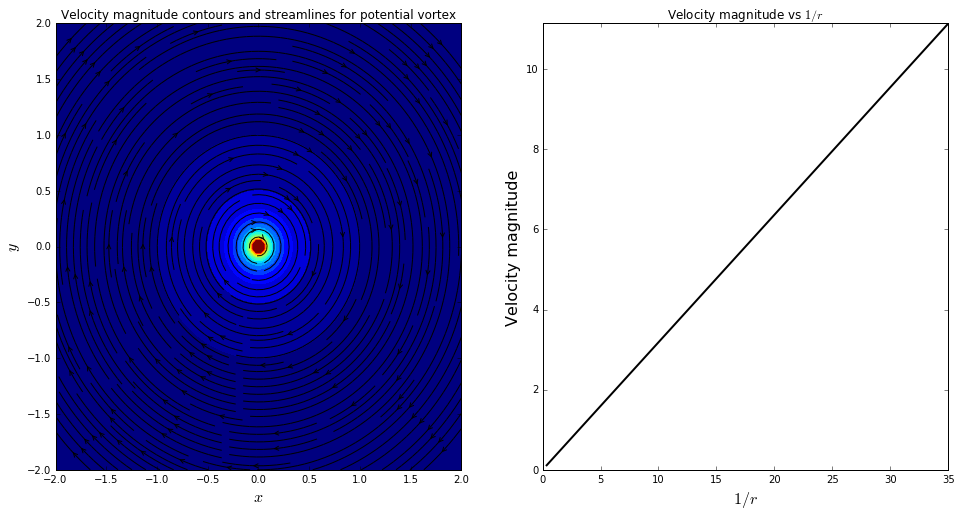

In [29]:
size = 8
pyplot.figure(figsize=(2*size, size))

pyplot.subplot(121)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, velo, levels = numpy.linspace(gamma/numpy.pi/2.0, gamma/numpy.pi/0.1, 20), extend='both')
pyplot.streamplot(X, Y, uvor, vvor, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.title('Velocity magnitude contours and streamlines for potential vortex')

pyplot.subplot(122)
pyplot.plot(1.0/numpy.sqrt(x[istart:]**2 + y[istart:]**2),vdiag[istart:], color='k', lw=2,)
pyplot.xlim(0.0, numpy.max(1.0/numpy.sqrt(x[istart:]**2 + y[istart:]**2)))
pyplot.ylim(0.0, numpy.max(vdiag[istart:]))
pyplot.xlabel('$1/r$', fontsize=16)
pyplot.ylabel('Velocity magnitude', fontsize=16)
pyplot.title('Velocity magnitude vs $1/r$')

### <u><i>P2 (a): Location of stagnation points: </i></u>

The velocity components for an ideal vortex are given as:

$$ u_r = \frac {1}{r} \frac {\partial \psi}{\partial \theta} = u_{\infty} \left( 1-\frac{R^2}{r^2} \right) cos\theta$$


$$ u_{\theta} =-\frac {\partial \psi}{\partial r} = -u_{\infty}sin\theta\left(1+\frac{R^2}{r^2}\right) - \frac{\Gamma}{2\pi r}$$

When $r = R$ , $u_r = 0$ and $u_{\theta}$ can be given as:

$$ u_{\theta} = -2u_{\infty}sin\theta - \frac{\Gamma}{2\pi R}$$

Solving $u_{\theta} = 0$ gives us stagnation points in polar coordinates:

$$ sin \theta _{s} = -\frac{\Gamma}{4\pi R u_{\infty}}$$

In cartesian co-ordinates, the above expression can be written as:

$$ x_s = \pm \sqrt{R^2 - y_s^2}$$ 

where $y_s =- \frac{\Gamma}{4 \pi U_{\infty}}$

Thus, coordinates of stagnation points are:

$$ \left( \pm \sqrt{R^2 + \left( \frac{\Gamma}{4 \pi u_{\infty}} \right) ^2}, - \frac{\Gamma}{4 \pi u_{\infty}} \right)$$

In [30]:
#doublet parameters:
kappa = 1.0
xd = 0.0; yd = 0.0

udoublet = - kappa/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
vdoublet = - kappa/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
psidoublet = - kappa/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)

#Compute combined velocity:
u = uvor + udoublet + uinf
v = vvor + vdoublet
psi = psi_vortex + psidoublet + uinf*Y

velo = numpy.sqrt(u**2+v**2)

velmin = 1.0E10
for i in range (N):
    for j in range (N):
        if velo[j,i] < velmin:
            velmin = velo[j,i]
            iloc = i; jloc = j
            
print('Radius from simulation  :', math.sqrt(X[jloc,iloc]**2 + Y[jloc,iloc]**2))
R = math.sqrt(kappa/2.0/math.pi/uinf)
print('Radius from calculation :', R)

Radius from simulation  : 0.4090597319457894
Radius from calculation : 0.3989422804014327


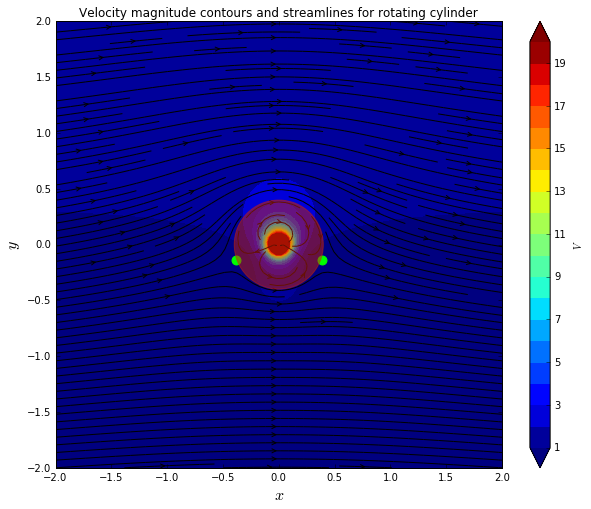

In [31]:
size = 8
pyplot.figure(figsize=(size+2, size))
xst = math.sqrt(R**2 + gamma**2/(4.0*math.pi*uinf)**2); yst = -gamma/(4.0*math.pi*uinf)


pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, velo, levels = numpy.linspace(1.0, 20.0, 20), extend='both')
pyplot.colorbar(label = '$V$')

pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')

circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter([-abs(X[jloc,iloc]), abs(X[jloc,iloc])], [Y[jloc,iloc], Y[jloc,iloc]], color='#00FF00', s=80, marker='o')
#pyplot.scatter([-xst, xst],[yst, yst], color='#CD2305', s=80, marker='o')
pyplot.title('Velocity magnitude contours and streamlines for rotating cylinder')

### <u><i>P2 (b): Stagnation points when $\Gamma \gg R$: </i></u>

As the circulation increases, the stagnation points move downward and closer to $x-$axis until ${\left( \frac{\Gamma}{4 \pi U_{\infty}} \right)^2}$ equals to $R^2$. When this happens, the stagnation points lie at $(0,-R)$. When the circulation continues to increase, such that ${(\frac{\Gamma}{4 \pi U_{\infty}})^2} >> R $ , the stagnation points move down and away from the cylinder.

### <u><i>P2 (d): Pressure as function of angle: </i></u>


Using Bernoulli's principle:

$$ p_{\infty} + \frac{1}{2}\rho u_{\infty}^2  = p + \frac{1}{2}\rho u^2$$

Let $C_{p}$ be the coefficient of pressure, such that:

$$ C_{p} = \frac{p - p_{\infty}}{\frac{1}{2} \rho U_{\infty}^2} $$


$$ \Rightarrow C_{p} = 1 - \left( \frac{U}{U_{\infty}} \right)^2 $$

Since $u_r = 0$ on the surface on the cylinder: 
$$u^2 = u_r^2 +u_{\theta}^2 = u_{\theta}^2$$

$$ \Rightarrow C_{p} = 1 - (\frac{u_{\theta}}{u_{\infty}})^2 $$

Now, for a vortex in uniform flow: 
$$ u_{\theta} = -2u_{\infty}sin\theta - \frac{\Gamma}{2\pi R}$$

Thus,
$$ C_{p} = 1 - \left( \frac{2u_{\infty}sin\theta - \frac{\Gamma}{2\pi R}}{u_{\infty}} \right) ^2 $$

### <u><i>P2 (c): Drag and lift on cylinder: </i></u>

The drag coefficient on a cylinder in potential flow can be expressed as:

$$c_{D} = \frac{1}{2}\int_{0}^{2\pi} -C_{p}cos\theta d\theta $$

$$\therefore c_{D} = \frac{1}{2}\int_{0}^{2\pi} \left[ -1 + 4 \sin ^2 \theta + \left( \frac{\Gamma}{2 \pi u_{\infty} R} \right) ^2 +  \left( \frac{2 \Gamma}{\pi u_{\infty} R} \right) \sin \theta  \right] \cos \theta d \theta $$

$$ \Rightarrow c_{D} = 0 $$

Likewise, the lift coefficient can be computed as:

$$c_{L} = \frac{1}{2}\int_{0}^{2\pi} -C_{p}sin\theta d\theta $$

$$\therefore c_{L} = \frac{1}{2}\int_{0}^{2\pi} \left[ -1 + 4 \sin ^2 \theta + \left( \frac{\Gamma}{2 \pi u_{\infty} R} \right) ^2 +  \left( \frac{2 \Gamma}{\pi u_{\infty} R} \right) \sin \theta  \right] \sin \theta d \theta $$

$$ \Rightarrow c_{L} = \frac{\Gamma}{u_{\infty} R} $$

The drag and lift forces can be calculated as:

$$ D = c_{D} \left( \rho u_{\infty}^2 R \right) = 0$$

$$ L = c_{L} \left( \rho u_{\infty}^2 R \right) = \rho u_{\infty}\Gamma $$


### <u><i>P2 (e): Comparison with d'Alembert's paradox and Kutta-Joukowski theorem: </i></u>


The condition of no-drag is true for all bodies in potential flows and is known as the d'Alembert's paradox. 

The Kutta-Joukowski theorem states that the force per unit length acting on a body is equal to product of the density, stream velocity and circulation and is perpendicular to the free stream velocity. Using this, the lift force on the body can be computed easily, without integration. 

In [32]:
#Test Kutta-Joukowski lift theorem
rho = 1.0

print('Computed lift using Kutta-Joukowski theorem:', rho*uinf*gamma)

Computed lift using Kutta-Joukowski theorem: 2.0
